# Import Libraries

In [1]:
# Import Libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

import warnings
warnings.filterwarnings('ignore')

# Explore Data

In [2]:
data_dir = 'C:/Users/aliza/OneDrive/Desktop/Tesla Stock Forecasting/Tesla_Dataset.csv'
data = pd.read_csv(data_dir, parse_dates= True , index_col= "Date")

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [6]:
data.shape

(2956, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7 KB


# Data Analysis

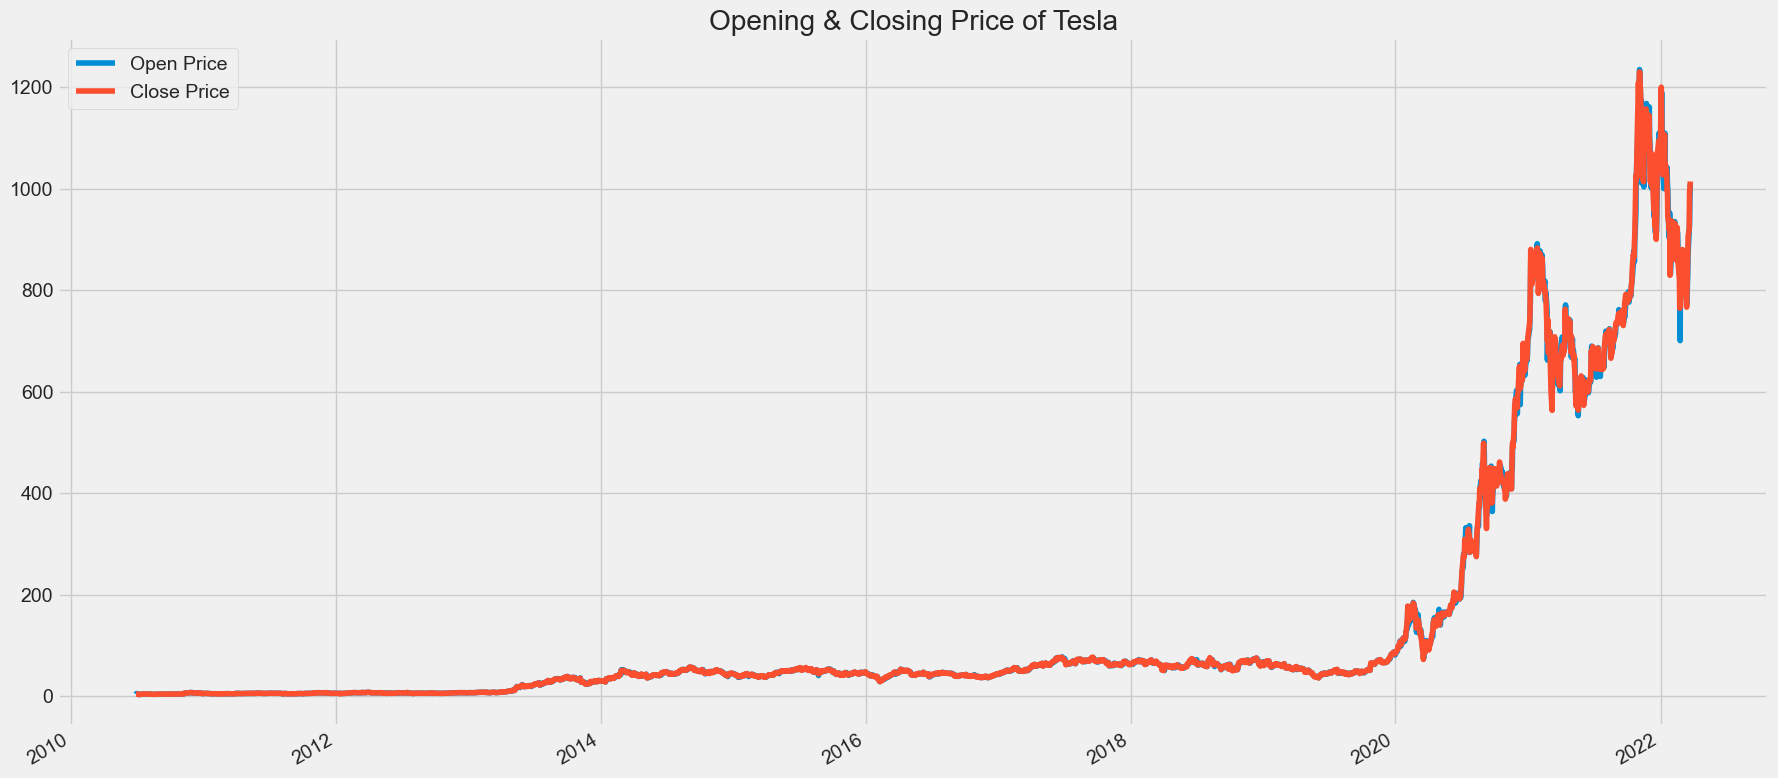

In [8]:
plt.figure(figsize=(18, 8))
data['Open'].plot()
data['Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price of Tesla")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

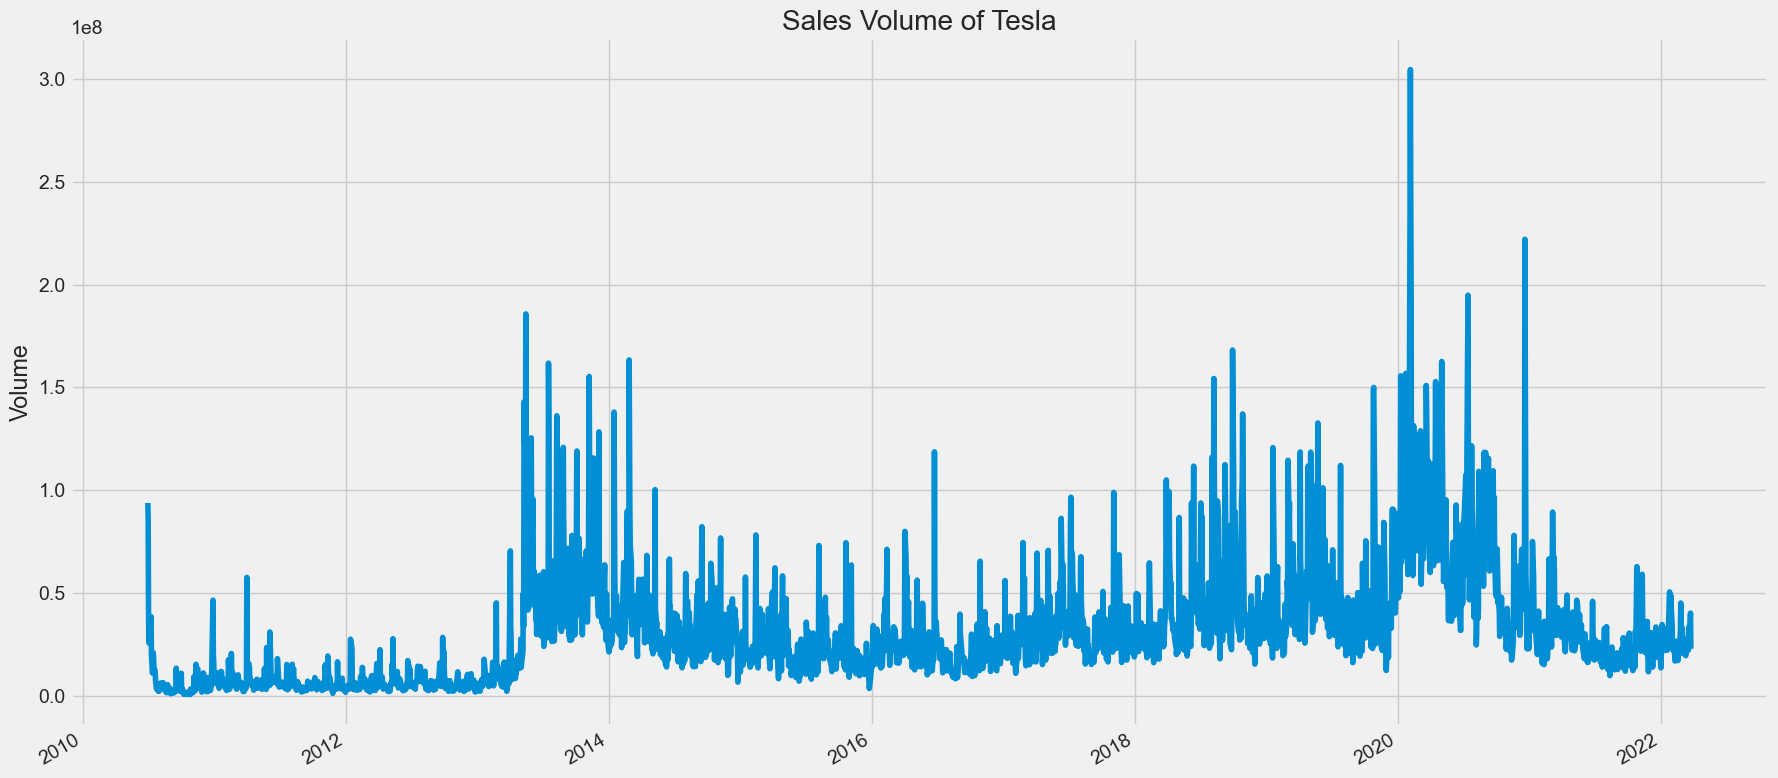

In [9]:
plt.figure(figsize=(18, 8))
data['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume of Tesla")
plt.tight_layout()
plt.show()

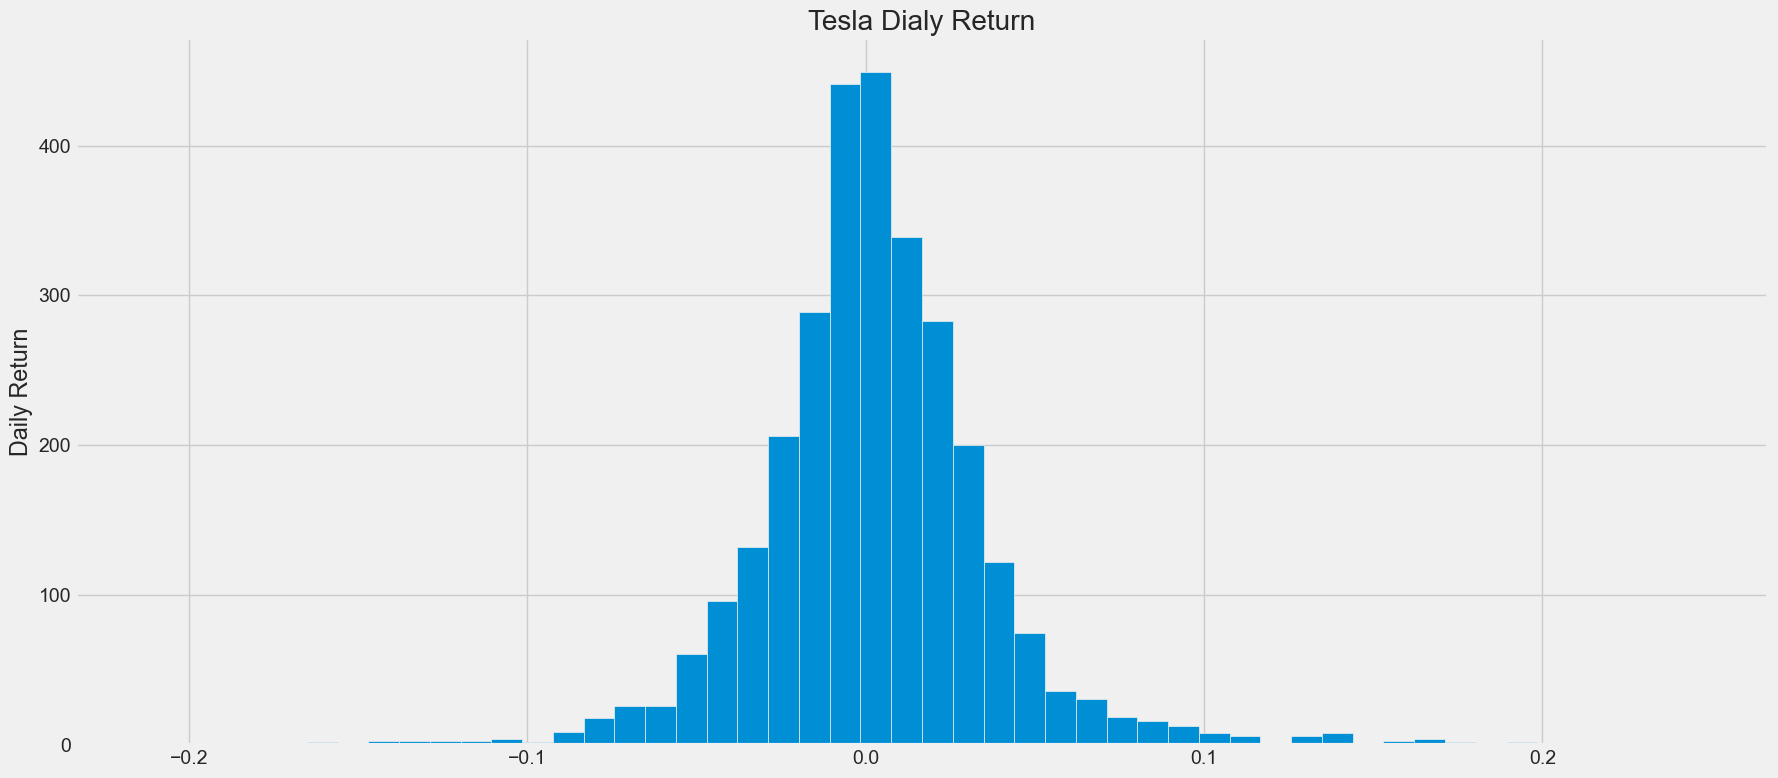

In [10]:
plt.figure(figsize=(18, 8))
data['Adj Close'].pct_change().hist(bins=50)
plt.ylabel('Daily Return')
plt.title(f'Tesla Dialy Return')
plt.tight_layout()
plt.show()

# Data Preprocessing

### Choosing Prediction Column

In [11]:
df=data['Close']
df=pd.DataFrame(df)

dataset=df.values
dataset.shape

(2956, 1)

In [12]:
dataset

array([[   4.778   ],
       [   4.766   ],
       [   4.392   ],
       ...,
       [ 993.97998 ],
       [ 999.109985],
       [1013.919983]])

### Normalizing Data

In [13]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

In [14]:
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.80767879],
       [0.81186057],
       [0.82393312]])

### Splitting the Data

In [15]:
# 75% to Train , 25% to Test
train_size = int(len(dataset)*.75)
test_size = len(dataset) - train_size

print("Train Size :",train_size,"Test Size :",test_size)


Train Size : 2217 Test Size : 739


In [16]:
# time step= 60
train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

In [17]:
train_data.shape, test_data.shape

((2217, 1), (799, 1))

### Creating training set

In [18]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(2157, 60)

In [21]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
x_train.shape , y_train.shape

((2157, 60, 1), (2157,))

# LSTM Model

### Model Structure

In [23]:
model_LSTM = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model_LSTM.compile(optimizer= 'adam', loss= 'mean_squared_error' )

In [24]:
model_LSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,465 (165.88 KB)

 Trainable params: 42,465 (165.88 KB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [25]:
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model_LSTM.fit(x_train, y_train, epochs= 100, batch_size= 32 , callbacks= callbacks )

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 2.1811e-04
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 6.4243e-06
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 6.4100e-06
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.1860e-06
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 5.4581e-06
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 7.3161e-06
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 4.3279e-06
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 6.8613e-06
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 3.9754e-06
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 4.4189e-06
Epoch 11/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 4.1780e-06
Epoch 12/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 4.8821e-06
Epoch 13/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 3.7506e-06
Epoch 14/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 3.7304e-06
E

### Model Evaluation

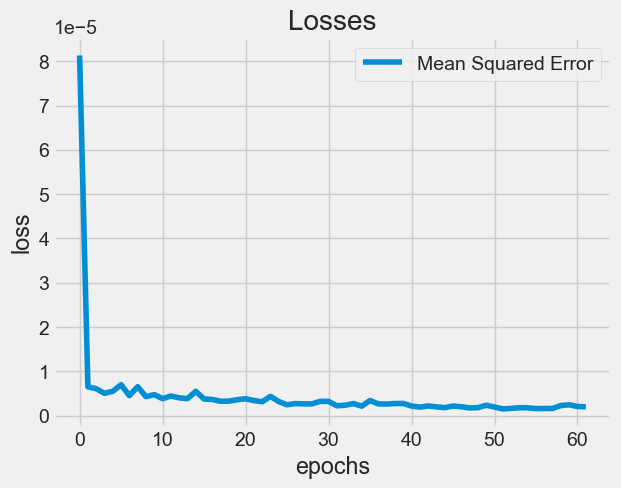

In [26]:
plt.plot(history.history["loss"])
plt.legend(['Mean Squared Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Predection

In [27]:
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
x_test.shape , y_test.shape

((739, 60, 1), (739,))

In [29]:
predictions = model_LSTM.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [30]:
predictions

array([[0.04136215],
       [0.04064355],
       [0.04012314],
       [0.03946541],
       [0.03821399],
       [0.03644091],
       [0.03593694],
       [0.03579923],
       [0.03550583],
       [0.03617643],
       [0.03765398],
       [0.0386443 ],
       [0.0383552 ],
       [0.03766765],
       [0.03692268],
       [0.0362886 ],
       [0.0349742 ],
       [0.03457361],
       [0.03457882],
       [0.03443261],
       [0.0329681 ],
       [0.03146458],
       [0.03066983],
       [0.0294738 ],
       [0.02903755],
       [0.02864828],
       [0.02835145],
       [0.02834306],
       [0.02829088],
       [0.02801154],
       [0.02730629],
       [0.02800031],
       [0.02891586],
       [0.03018967],
       [0.03078766],
       [0.03156173],
       [0.03227587],
       [0.0319411 ],
       [0.03183787],
       [0.03187225],
       [0.03271731],
       [0.03331989],
       [0.03371291],
       [0.03330768],
       [0.03307428],
       [0.03312567],
       [0.03291684],
       [0.032

In [31]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(739, 1)

In [32]:
predictions

array([[  53.90102 ],
       [  53.01948 ],
       [  52.381065],
       [  51.57419 ],
       [  50.039013],
       [  47.863884],
       [  47.24564 ],
       [  47.076702],
       [  46.716778],
       [  47.53944 ],
       [  49.352024],
       [  50.5669  ],
       [  50.21224 ],
       [  49.368797],
       [  48.454895],
       [  47.677048],
       [  46.064594],
       [  45.573177],
       [  45.579567],
       [  45.400208],
       [  43.60362 ],
       [  41.75918 ],
       [  40.78422 ],
       [  39.316982],
       [  38.781815],
       [  38.30428 ],
       [  37.940136],
       [  37.92985 ],
       [  37.865833],
       [  37.523155],
       [  36.65799 ],
       [  37.50938 ],
       [  38.63253 ],
       [  40.19518 ],
       [  40.92876 ],
       [  41.878353],
       [  42.754425],
       [  42.34375 ],
       [  42.217113],
       [  42.259285],
       [  43.29596 ],
       [  44.03517 ],
       [  44.51731 ],
       [  44.02019 ],
       [  43.73387 ],
       [  

### Performance Evaluation Metrics

In [33]:
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
print("Root Mean Squared Error (RMSE):", RMSE)

# Calculate MSE
MSE = mean_squared_error(y_test.flatten(), predictions.flatten())
MSE = round(MSE, 2)
print("Mean Squared Error (MSE):", MSE)

# Calculate Mean Absolute Error (MAE)
MAE = np.mean(np.abs(y_test.flatten() - predictions.flatten())).round(2)
print("Mean Absolute Error (MAE):", MAE)

# Calculate R-squared (R²) Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test.flatten(), predictions.flatten())
r2 = round(r2, 2)
print("R-squared (R²) Score:", r2)

# Calculate Mean Absolute Percentage Error (MAPE)
MAPE = np.mean(np.abs((y_test.flatten() - predictions.flatten()) / y_test.flatten())) * 100
print("Mean Absolute Percentage Error (MAPE):", MAPE.round(2), "%")

Root Mean Squared Error (RMSE): 38.07
Mean Squared Error (MSE): 3399.4
Mean Absolute Error (MAE): 39.25
R-squared (R²) Score: 0.97
Mean Absolute Percentage Error (MAPE): 6.87 %


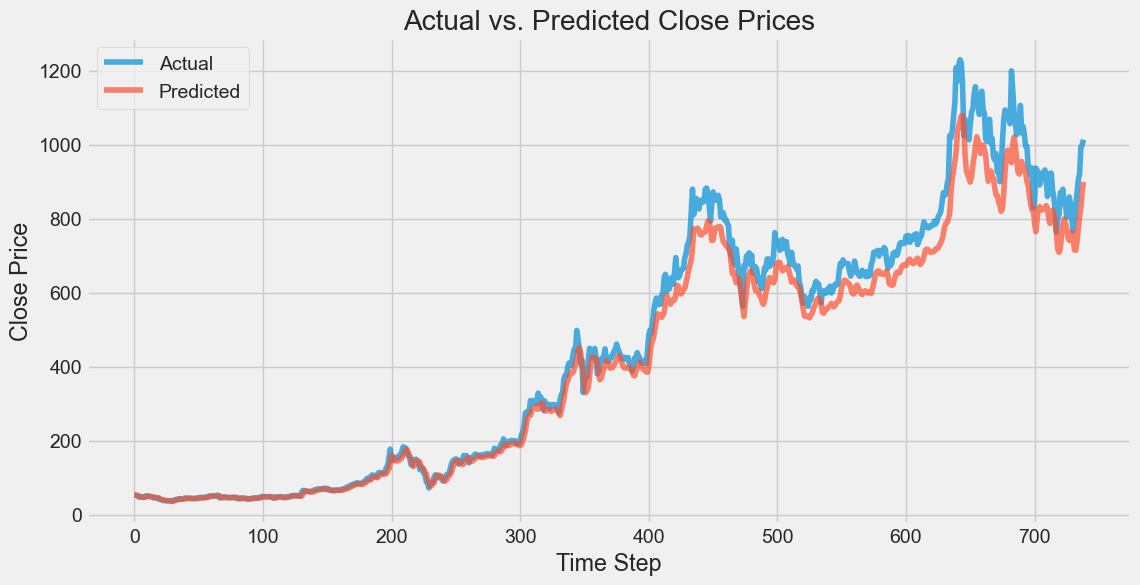

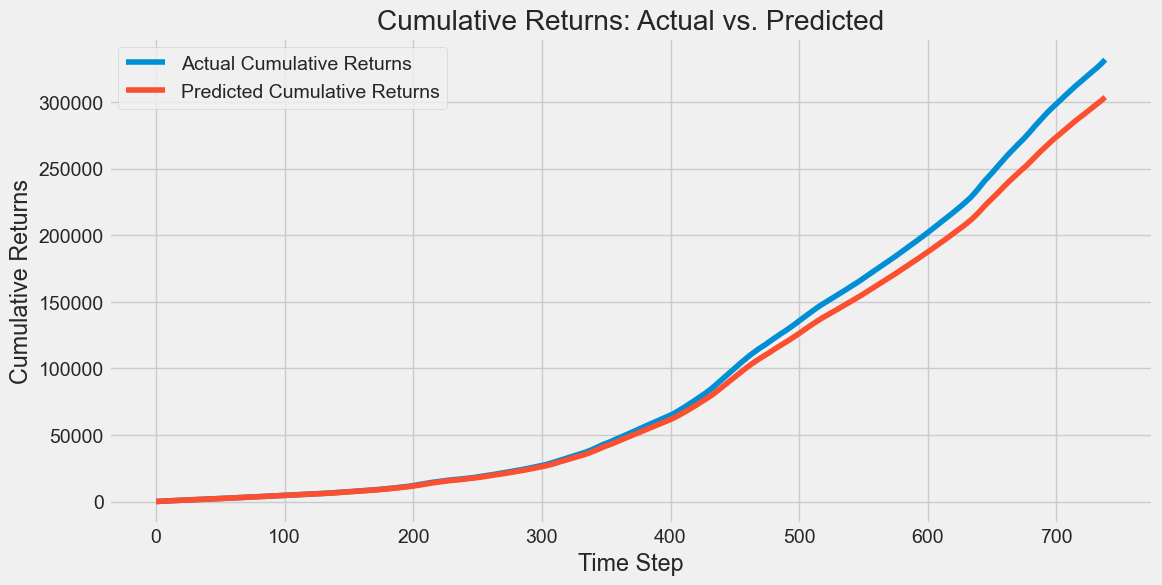

In [34]:
# Additional Visualization: Actual vs. Predicted Plot
plt.figure(figsize=(12, 6))
plt.title("Actual vs. Predicted Close Prices")
plt.plot(y_test.flatten(), label='Actual', alpha=0.7)
plt.plot(predictions.flatten(), label='Predicted', alpha=0.7)
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Additional Visualization: Cumulative Returns
actual_returns = np.cumsum(y_test.flatten())
predicted_returns = np.cumsum(predictions.flatten())
plt.figure(figsize=(12, 6))
plt.plot(actual_returns, label='Actual Cumulative Returns')
plt.plot(predicted_returns, label='Predicted Cumulative Returns')
plt.xlabel("Time Step")
plt.ylabel("Cumulative Returns")
plt.title("Cumulative Returns: Actual vs. Predicted")
plt.legend()
plt.show()

### Visualize Predictions with The Data

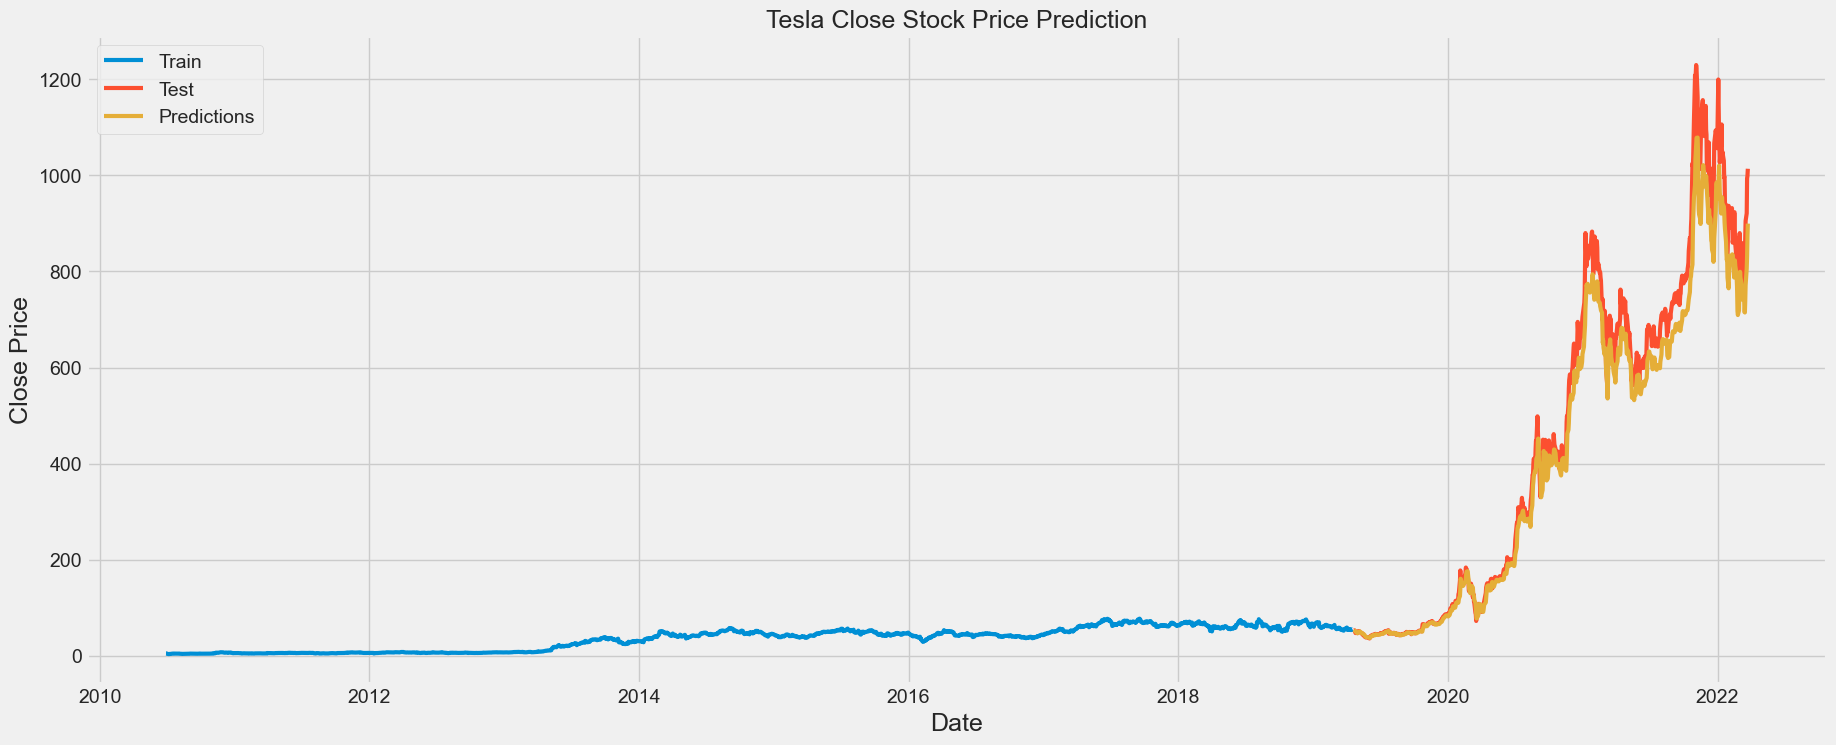

In [35]:
train = df.iloc[:train_size , 0:1]
test = df.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (20, 8))
plt.title('Tesla Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['Close'], linewidth= 3)
plt.plot(test['Close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()

# Forecast Next 30 Days

In [36]:
from datetime import timedelta

In [37]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [38]:
future = 30
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model_LSTM.predict(Xin, batch_size=5)
    forcast.append(out[0, 0]) 
    print(forcast)
    Xin = insert_end(Xin, out[0, 0]) 
    time.append(pd.to_datetime(df.index[-1]) + timedelta(days=i))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[0.73081607]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.73081607, 0.70152575]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[0.73081607, 0.70152575, 0.65956867]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[0.73081607, 0.70152575, 0.65956867, 0.6140303]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[0.73081607, 0.70152575, 0.65956867, 0.6140303, 0.5686208]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[0.73081607, 0.70152575, 0.65956867, 0.6140303, 0.5686208, 0.5255048]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[0.73081607, 0.70152575, 0.65956867, 0.6140303, 0.5686208, 0.5255048, 0.4860734]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0.73081607, 0.70152575, 0.65956867, 0.6140303, 0.5686208, 0.5255048, 0.4860734, 0.4511345]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[0.73081607, 0.70152575, 0.65956867, 0.6140303, 0.5686208, 0.5255048, 0.4860734, 0.4511345, 0.42101333]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.73081607, 0.70152575, 0.65956867, 0.6140303, 0.5686208, 0.5255048, 0.4860734, 0.4511345,

In [39]:
time

[Timestamp('2022-03-24 00:00:00'),
 Timestamp('2022-03-25 00:00:00'),
 Timestamp('2022-03-26 00:00:00'),
 Timestamp('2022-03-27 00:00:00'),
 Timestamp('2022-03-28 00:00:00'),
 Timestamp('2022-03-29 00:00:00'),
 Timestamp('2022-03-30 00:00:00'),
 Timestamp('2022-03-31 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-04-02 00:00:00'),
 Timestamp('2022-04-03 00:00:00'),
 Timestamp('2022-04-04 00:00:00'),
 Timestamp('2022-04-05 00:00:00'),
 Timestamp('2022-04-06 00:00:00'),
 Timestamp('2022-04-07 00:00:00'),
 Timestamp('2022-04-08 00:00:00'),
 Timestamp('2022-04-09 00:00:00'),
 Timestamp('2022-04-10 00:00:00'),
 Timestamp('2022-04-11 00:00:00'),
 Timestamp('2022-04-12 00:00:00'),
 Timestamp('2022-04-13 00:00:00'),
 Timestamp('2022-04-14 00:00:00'),
 Timestamp('2022-04-15 00:00:00'),
 Timestamp('2022-04-16 00:00:00'),
 Timestamp('2022-04-17 00:00:00'),
 Timestamp('2022-04-18 00:00:00'),
 Timestamp('2022-04-19 00:00:00'),
 Timestamp('2022-04-20 00:00:00'),
 Timestamp('2022-04-

### Create forecasted dataframe

In [40]:
forcasted_output = np.asanyarray(forcast)   
forcasted_output = forcasted_output.reshape(-1, 1) 
forcasted_output = scaler.inverse_transform(forcasted_output) 

In [41]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "Date", "Forecasted"

## Forecasted tesla close price

In [42]:
df_result

,Date,Forecasted
0,2022-03-24,899.688660
1,2022-03-25,863.756775
2,2022-03-26,812.285889
3,2022-03-27,756.421692
4,2022-03-28,700.715637
5,2022-03-29,647.823120
6,2022-03-30,599.450562
7,2022-03-31,556.589233
8,2022-04-01,519.638123
9,2022-04-02,488.523346


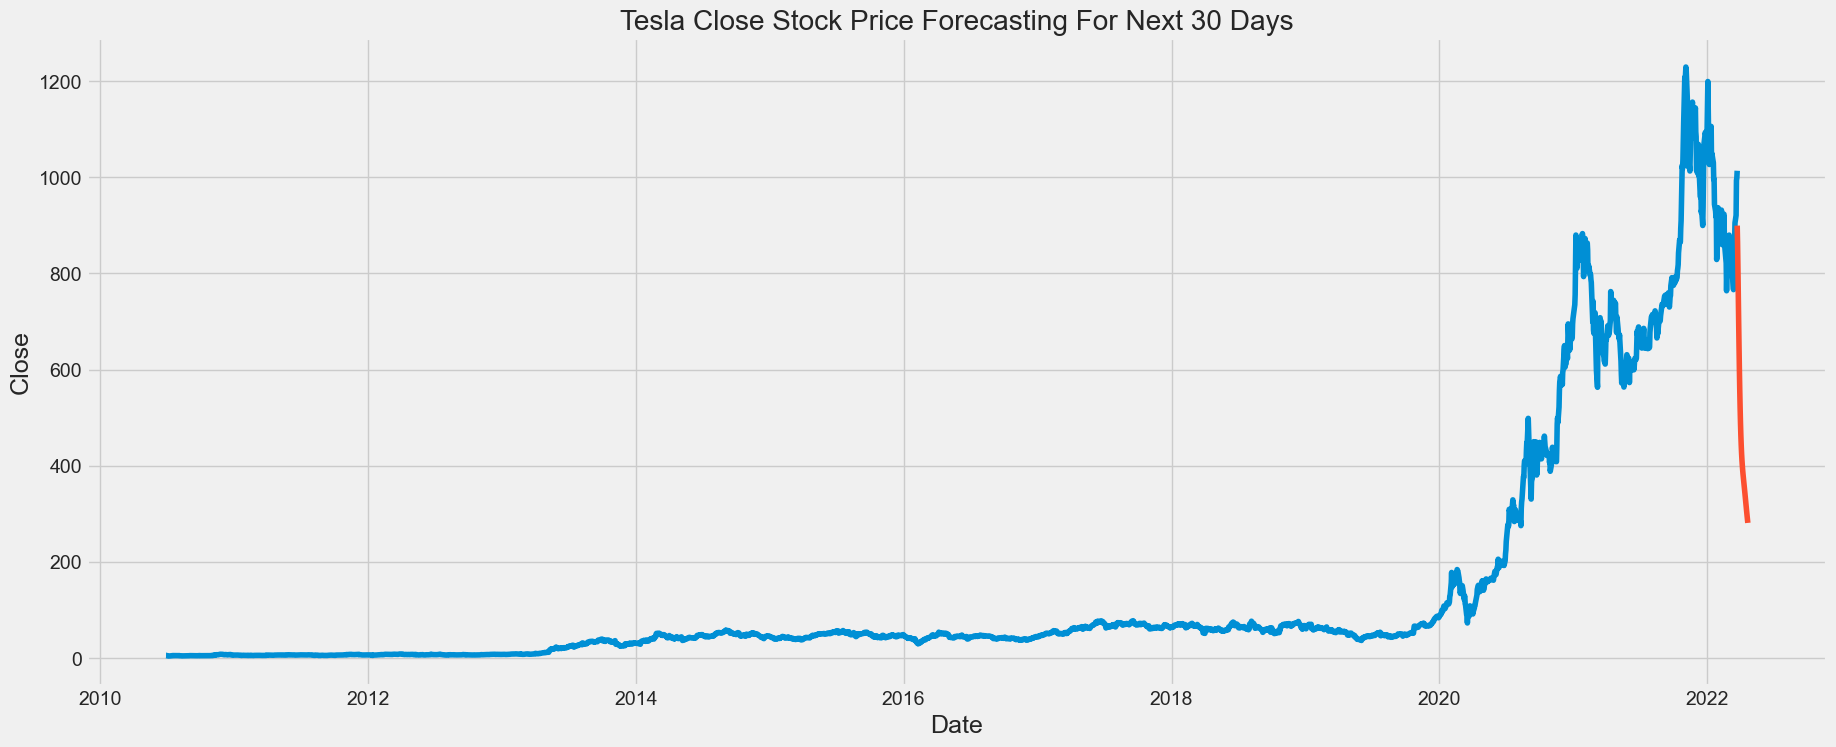

In [43]:
plt.figure(figsize=(20, 8))
plt.title('Tesla Close Stock Price Forecasting For Next 30 Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close' ,fontsize=18)
plt.plot(df['Close'])
plt.plot(df_result.set_index('Date')[['Forecasted']])
plt.show()